# Compare optimised Kalman filter


This repo has two Kalman filters `kalman_filter.py` and `kalman_filter_optimised.py`.

We use the latter for runs in conjunction with nested sampling, since it it much faster.

But do the two filters give the same results?



# Setup 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../src") # Remove src if already exists 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package

## 1. Generate synthetic data

We generate synthetic data to test our scheme. 


In [17]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData

P   = SystemParameters()    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234
INFO:root:The values for χ are as follows: [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]


# Kalman filter 

We have confirmed that our data looks ok. How does our two KFs do when we run it on the same data?

In [18]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import PhaseModel
from kalman_filter import KalmanFilter
from kalman_filter_optimised import KalmanFilter as KalmanFilter_optimised
from priors import bilby_priors_dict
import numpy as np 

#Define the model to be used by the Kalman Filter
model = PhaseModel(P,PTA)


#Initialise the Kalman filter
KF     = KalmanFilter(model,data.phi_measured,PTA)
KF_opt = KalmanFilter_optimised(model,data.phi_measured,PTA)


#Get some parameters
init_parameters,constrained_prior = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
optimal_parameters = constrained_prior.sample(1)

#Now run the two Kalman filters

ll,xresults,yresults = KF.likelihood_plotter(optimal_parameters)
ll_opt,xresults_opt,yresults_opt = KF_opt.likelihood_plotter(optimal_parameters)

INFO:root:You are using the Pulsar terms measurement model
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


first state phase value =  0.0
first state frequency value =  0.0
The likelihood is 466263.01128823793


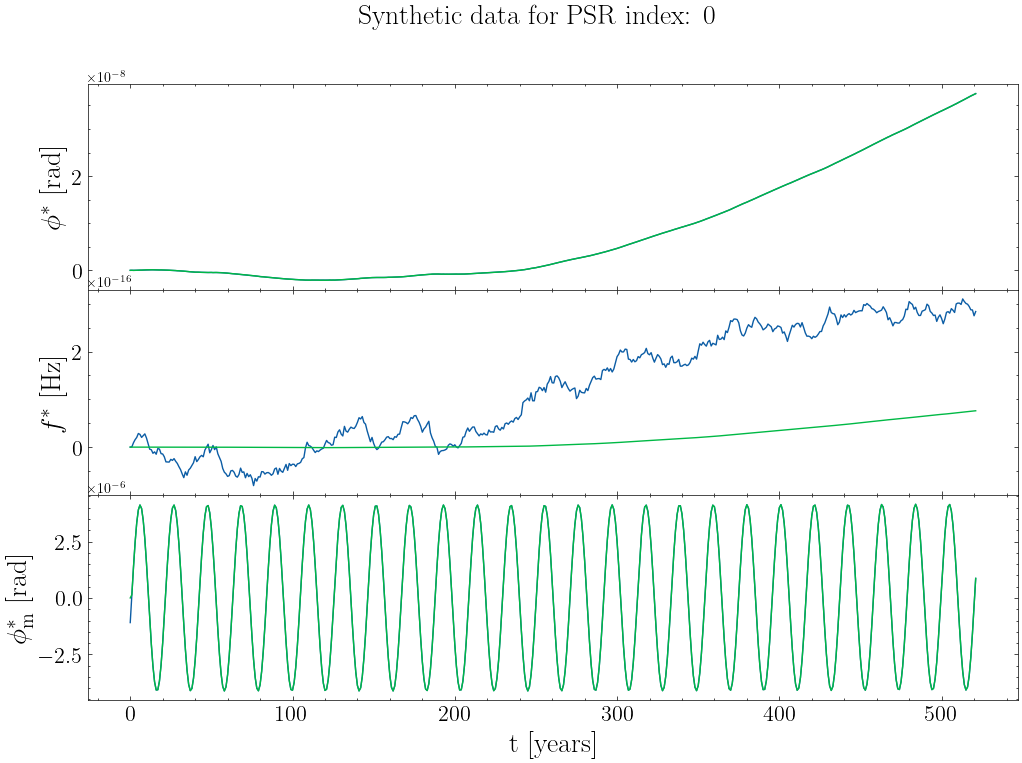

In [19]:
from plotting import plot_synthetic_data
#...and plot the results 
results_phi = xresults[:,0::2]
results_f = xresults[:,1::2] 
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=0,state_phi_pred=results_phi,state_f_pred=results_f,phi_measured_pred=yresults)
print(f"The likelihood is {ll}")

first state phase value =  0.0
first state frequency value =  0.0
The likelihood is 466263.01128823793


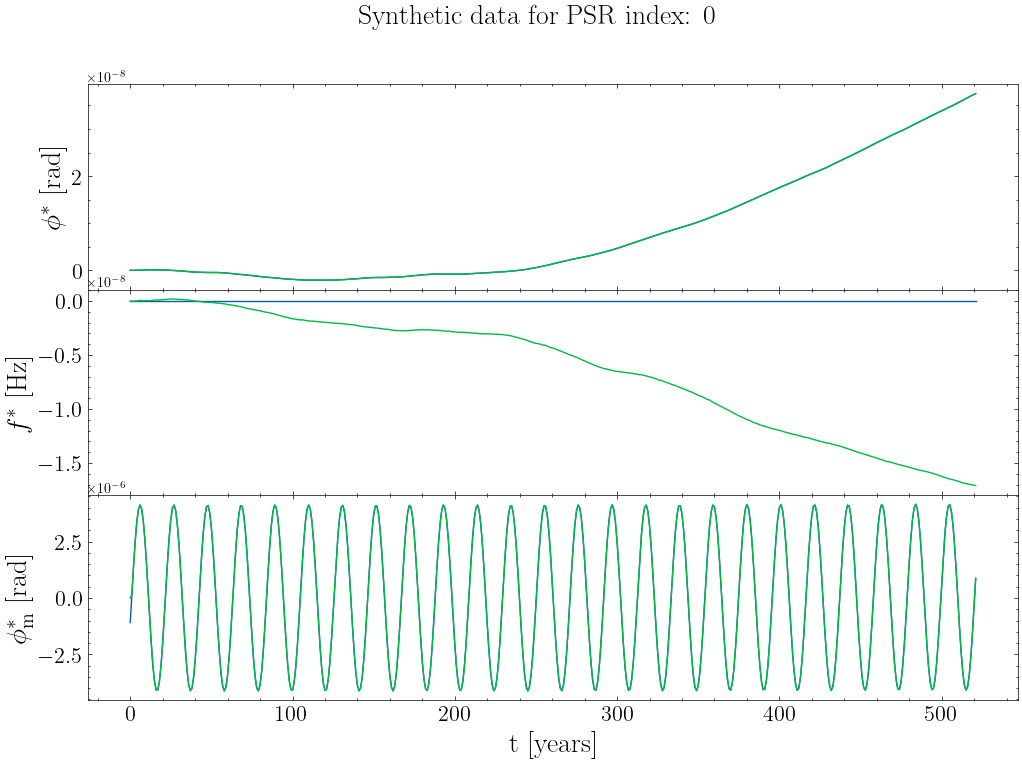

In [20]:

#...and plot the results 
results_phi = xresults_opt[:,0::2]
results_f = xresults_opt[:,1::2] 
plot_synthetic_data(data.t,
                    data.state_phi,
                    data.state_f,
                    data.phi_measured,
                    psr_index=0,
                    state_phi_pred=results_phi,
                    state_f_pred=results_f,
                    phi_measured_pred=yresults_opt)
print(f"The likelihood is {ll}")

This is reassuring: the $\phi$ and $\phi_m$ states are the same, as are the likelihoods.

Obviously the $f$ states are different, but I think this is just because the filter is just guessing at what the $f$ state is...?

## High noise example 


Lets repeat the above exercise but with an increased $\sigma_m$.

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234


INFO:root:The values for χ are as follows: [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]
INFO:root:You are using the Pulsar terms measurement model
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


first state phase value =  0.0
first state frequency value =  0.0
The likelihood is 247505.80258345132
first state phase value =  0.0
first state frequency value =  0.0
The likelihood is 247505.80258345132


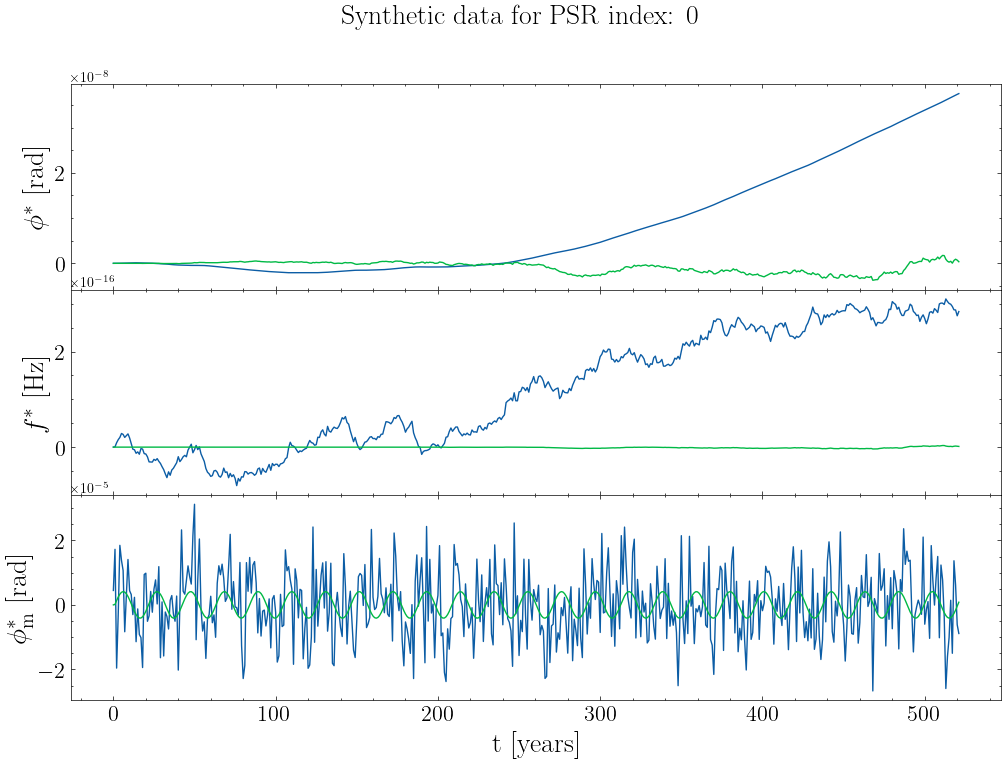

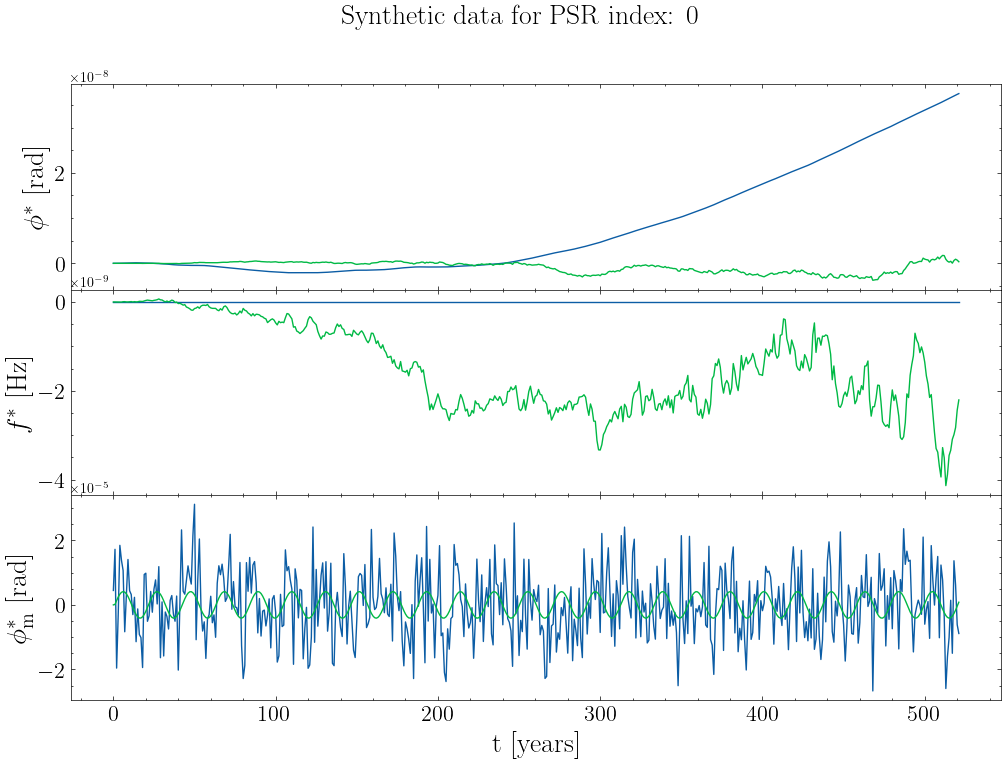

In [22]:

#####----DATA----#####


P   = SystemParameters(σm=1e-5)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    






#####----KALMAN----#####


#Define the model to be used by the Kalman Filter
model = PhaseModel(P,PTA)


#Initialise the Kalman filter
KF     = KalmanFilter(model,data.phi_measured,PTA)
KF_opt = KalmanFilter_optimised(model,data.phi_measured,PTA)


#Get some parameters
init_parameters,constrained_prior = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
optimal_parameters = constrained_prior.sample(1)

#Now run the two Kalman filters

ll,xresults,yresults = KF.likelihood_plotter(optimal_parameters)
ll_opt,xresults_opt,yresults_opt = KF_opt.likelihood_plotter(optimal_parameters)



#####----PLOTTING----#####

results_phi = xresults[:,0::2]
results_f = xresults[:,1::2] 
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=0,state_phi_pred=results_phi,state_f_pred=results_f,phi_measured_pred=yresults)
print(f"The likelihood is {ll}")




results_phi = xresults_opt[:,0::2]
results_f = xresults_opt[:,1::2] 
plot_synthetic_data(data.t,
                    data.state_phi,
                    data.state_f,
                    data.phi_measured,
                    psr_index=0,
                    state_phi_pred=results_phi,
                    state_f_pred=results_f,
                    phi_measured_pred=yresults_opt)
print(f"The likelihood is {ll}")




